# salary prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Df = pd.read_csv('age_salary.csv')
Df.head()

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0


In [3]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10 non-null     int64  
 1   Nation          10 non-null     object 
 2   purchased_item  10 non-null     object 
 3   salary          8 non-null      float64
 4   age             8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 528.0+ bytes


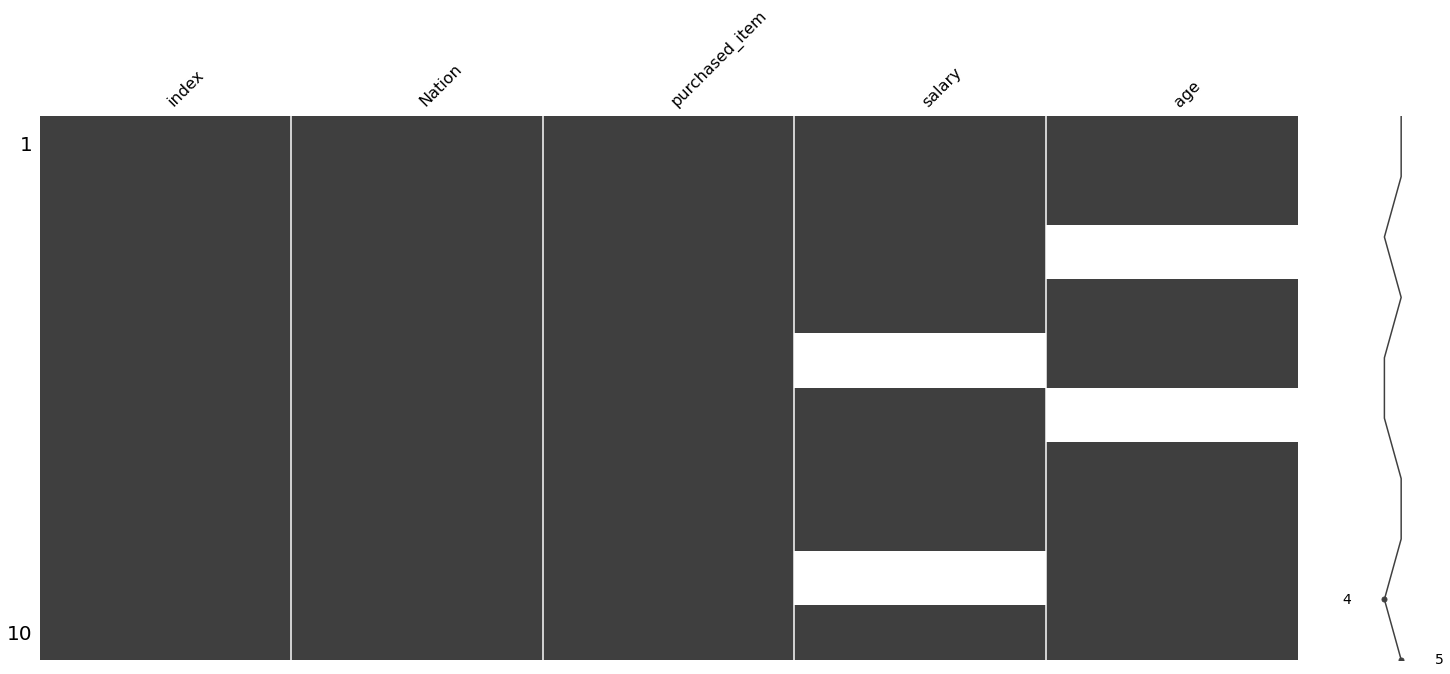

In [4]:
import missingno
missingno.matrix(Df)

* we can see that there are missing values 

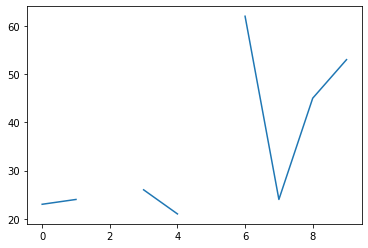

In [6]:
Df.age.plot()

In [8]:
Df.age.fillna(Df['age'].mean(), inplace = True)

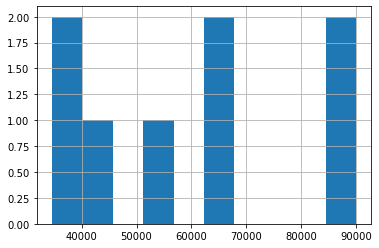

In [13]:
Df.salary.hist()

In [14]:
Df.salary.fillna(Df.salary.mean(), inplace = True)

In [15]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10 non-null     int64  
 1   Nation          10 non-null     object 
 2   purchased_item  10 non-null     object 
 3   salary          10 non-null     float64
 4   age             10 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 528.0+ bytes


In [16]:
for i in Df.columns:
    if not pd.api.types.is_numeric_dtype(Df[i]):
        Df[i] = Df[i].astype('category')
        Df[i] = Df[i].cat.codes
    

In [17]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10 non-null     int64  
 1   Nation          10 non-null     int8   
 2   purchased_item  10 non-null     int8   
 3   salary          10 non-null     float64
 4   age             10 non-null     float64
dtypes: float64(2), int64(1), int8(2)
memory usage: 388.0 bytes


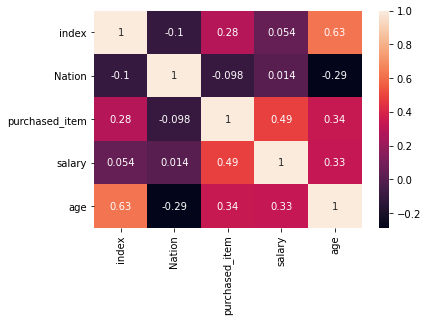

In [18]:
corr = Df.corr()
sns.heatmap(corr,
           annot = True)

In [19]:
X = Df.drop('salary', axis = 1)
y = Df['salary'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_pred, y_test)

25402.385352506943

In [27]:
mean_squared_error(y_pred, y_test)

707479142.7493131

In [28]:
import joblib
joblib.dump(lr, 'LinearRegression.pkl')

['LinearRegression.pkl']